¡ Hola Ilse! Como te va?



 Mi nombre es Facundo Lozano! Un gusto conocerte, seré tu revisor en este proyecto.



 A continuación un poco sobre la modalidad de revisión que usaremos:



 Cuando enccuentro un error por primera vez, simplemente lo señalaré, te dejaré encontrarlo y arreglarlo tú cuenta. Además, a lo largo del texto iré haciendo algunas observaciones sobre mejora en tu código y también haré comentarios sobre tus percepciones sobre el tema. Pero si aún no puedes realizar esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a comentarios y discusiones sobre el tema.



 Encontrará mis comentarios a continuación: **no los mueva, modifique ni elimine**.



 Puedes encontrar mis comentarios en cuadros verdes, amarillos o rojos como este:



 <div class="alert alert-block alert-success">

 <b>Comentario del revisor.</b> <a class="tocSkip"></a>



 Exito. Todo se ha hecho de forma exitosa.

 </div>



 <div class="alert alert-block alert-warning">

 <b>Comentario del revisor.</b> <a class="tocSkip"></a>



 Observación. Algunas recomendaciones.

 </div>



 <div class="alert alert-block alert-danger">



 <b>Comentario del revisor.</b> <a class="tocSkip"></a>



 Necesita arreglos. Este apartado necesita algunas correcciones. El trabajo no puede ser aceptado con comentarios rojos.

 </div>



 Puedes responder utilizando esto:



 <div class="alert alert-block alert-info">

 <b>Respuesta de estudiante.</b> <a class="tocSkip"></a>

 </div>

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 2) </b> <a class="tocSkip"></a>

Hola Ilse! Felicitaciones porque has corregido los detalles marcados en nuestra iteración anterior. Ahora si este proyecto está en total condiciones de ser aprobado, bien hecho!
    
Éxitos en tu camino dentro del mundo de los datos y saludos!

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 1) </b> <a class="tocSkip"></a>
    
Ilse, quería tomarme este tiempo al inicio de tu proyecto para comentarte mis apreciaciones generales de esta iteración de tu entrega.

Siempre me gusta comenzar dando la bienvenida al mundo de los datos a los estudiantes, te deseo lo mejor y espero que consigas lograr tus objetivos. Personalmente me gusta brindar el siguiente consejo, "Está bien equivocarse, es normal y es lo mejor que te puede pasar. Aprendemos de los errores y eso te hará mejor programadora ya que podrás descubrir cosas a medida que avances y son estas cosas las que te darán esa experiencia para ser una gran cientifica de datos."
    
Ahora si yendo a esta notebook.  Felicitaciones Ilse, has hecho un gran trabajo a lo largo del proyecto, quiero destacar tu gran manejo tanto de python como de las herramientas ML para el modelado, solo hubo unos pequeños puntos importantes al proyecto que nos hemos olvidado pero que estoy seguro que podrás corregir para nuestra próxima iteración! :)
    
Éxitos y saludos Ilse, espero a nuestra próxima iteraicón!

# Sprint 13 - Ilse Salinas

# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

## Preparación

In [1]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [2]:
# leer los datos
df = pd.read_csv('/datasets/taxi.csv')
print('Informacion del dataframe: \n')
df.info()
print('\n',df.head())

Informacion del dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB

               datetime  num_orders
0  2018-03-01 00:00:00           9
1  2018-03-01 00:10:00          14
2  2018-03-01 00:20:00          28
3  2018-03-01 00:30:00          20
4  2018-03-01 00:40:00          32


In [3]:
# checar si hay valores nulos
print('Valores nulos por columna:\n', df.isnull().sum())

Valores nulos por columna:
 datetime      0
num_orders    0
dtype: int64


In [4]:
# cambiar tipo de dato de objeto a fecha
df['datetime'] = pd.to_datetime(df['datetime'])
print('\nTipo de dato de la columna datetime:', df['datetime'].dtype)


Tipo de dato de la columna datetime: datetime64[ns]


In [5]:
# columna de fecha como indice
df.set_index('datetime', inplace=True)
print('Indice ha sido modificado, columna datetime es nuevo indice.\n')
print('\nInformacion del dataframe: \n')
df.info()

Indice ha sido modificado, columna datetime es nuevo indice.


Informacion del dataframe: 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [6]:
# imprimir muestra de dataframe
print('Primeras cinco filas del dataframe: \n')
print(df.head())

Primeras cinco filas del dataframe: 

                     num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32


  <div class="alert alert-block alert-success">


 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Hasta aquí excelente procedimiento de importanción de librerías manteniendolas por separado de nuestros datos, por otro lado excelente procedimiento de carga de datos. Sigamos!

## Análisis

In [7]:
# remuestrear de tal forma que cada punto de datos de los datos originales caigan dentro de intervalos de una hora
# se suman los taxis pedidos por cada hora transcurrida
df_hourly = df.resample('H').sum()
print('Primeras cinco filas del dataframe: \n')
print(df_hourly.head())

Primeras cinco filas del dataframe: 

                     num_orders
datetime                       
2018-03-01 00:00:00         124
2018-03-01 01:00:00          85
2018-03-01 02:00:00          71
2018-03-01 03:00:00          66
2018-03-01 04:00:00          43


  <div class="alert alert-block alert-success">


 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Bien hecho al resamplear nuestros datos mediante 1H!

In [8]:
# incluir características que puedan ayudar al modelo a capturar patrones temporales y tendencias
# caracteristicas del calendario
df_hourly['hour'] = df_hourly.index.hour
df_hourly['day_of_week'] = df_hourly.index.dayofweek
df_hourly['month'] = df_hourly.index.month

# calcular la diferencia para hacer la serie más estacionaria
df_hourly['diff'] = df_hourly['num_orders'].diff()
df_hourly['diff'] = df_hourly['num_orders'].diff().shift(-1)


print(df_hourly.sample(3))

                     num_orders  hour  day_of_week  month  diff
datetime                                                       
2018-06-20 14:00:00          73    14            2      6 -20.0
2018-04-13 23:00:00         105    23            4      4  48.0
2018-06-02 13:00:00          53    13            5      6  16.0


<div class="alert alert-block alert-success">


<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Perfecta creación de nuevas features derivadas del index como así los diferenciales, si quisieramos podríamos agregar más cantidad de días diferenciales!

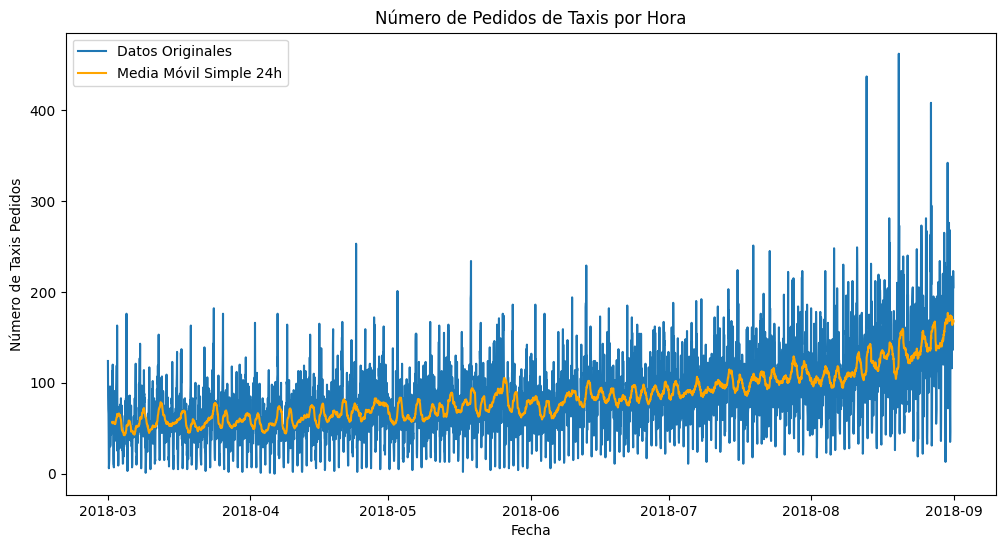

In [9]:
# suavizar grafica con la media movil 
# calcular la media movil simple con una ventana de 24 horas 
df_hourly['MMS_24h'] = df_hourly['num_orders'].rolling(window=24).mean()

# graficar los datos originales y la media movil
plt.figure(figsize=(12, 6))
plt.plot(df_hourly['num_orders'], label='Datos Originales')
plt.plot(df_hourly['MMS_24h'], label='Media Móvil Simple 24h', color='orange')
plt.title('Número de Pedidos de Taxis por Hora')
plt.xlabel('Fecha')
plt.ylabel('Número de Taxis Pedidos')
plt.legend()
plt.show()

  <div class="alert alert-block alert-success">


 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente visualización de los pedidos a lo largo del tiempo como así la media movil!

En la grafica se puede observar la tendencia del aumento de pedido de taxis en loss meses de julio a agosto correspondiente ete periodo a las vacaciones de verano. De acuerdo con esta gráfica se puede observar que la serie temporal demostrada no es estacionaria porque el valor medio cambia. No obstante, si hacemos un análisis de año tras año, probable y muy seguramente se repetiría el mismo patrón haciéndolo estacionario.

In [10]:
# manejar filas con valores nulos 
df_hourly.dropna(inplace=True)

In [11]:
# crear columna del target dentro del dataframe correspondiente a cantidad de pedidos para la proxima hora
df_hourly['target'] = df_hourly['num_orders'].shift(-1)
df_hourly.dropna(inplace=True)

In [12]:
# impresion del dataframe completo
print(df_hourly.head())

                     num_orders  hour  day_of_week  month  diff    MMS_24h  \
datetime                                                                     
2018-03-01 23:00:00          58    23            3      3  32.0  56.833333   
2018-03-02 00:00:00          90     0            4      3  30.0  55.416667   
2018-03-02 01:00:00         120     1            4      3 -45.0  56.875000   
2018-03-02 02:00:00          75     2            4      3 -11.0  57.041667   
2018-03-02 03:00:00          64     3            4      3 -44.0  56.958333   

                     target  
datetime                     
2018-03-01 23:00:00    90.0  
2018-03-02 00:00:00   120.0  
2018-03-02 01:00:00    75.0  
2018-03-02 02:00:00    64.0  
2018-03-02 03:00:00    20.0  


  <div class="alert alert-block alert-success">


 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Previo a continuar Ilse deberíamos poder visualizar las diferentes gráficas provista por el seasonal_decompose, deberíamos poder ver tanto a partir de los métodos .trend, .resid y .seasonal
    
    Excelente agregado de lo solicitado Ilse!

In [13]:
# aplicar seasonal_decompose
decomposed = seasonal_decompose(df_hourly['num_orders'], model='additive', period=24)

# acceder a las componentes
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

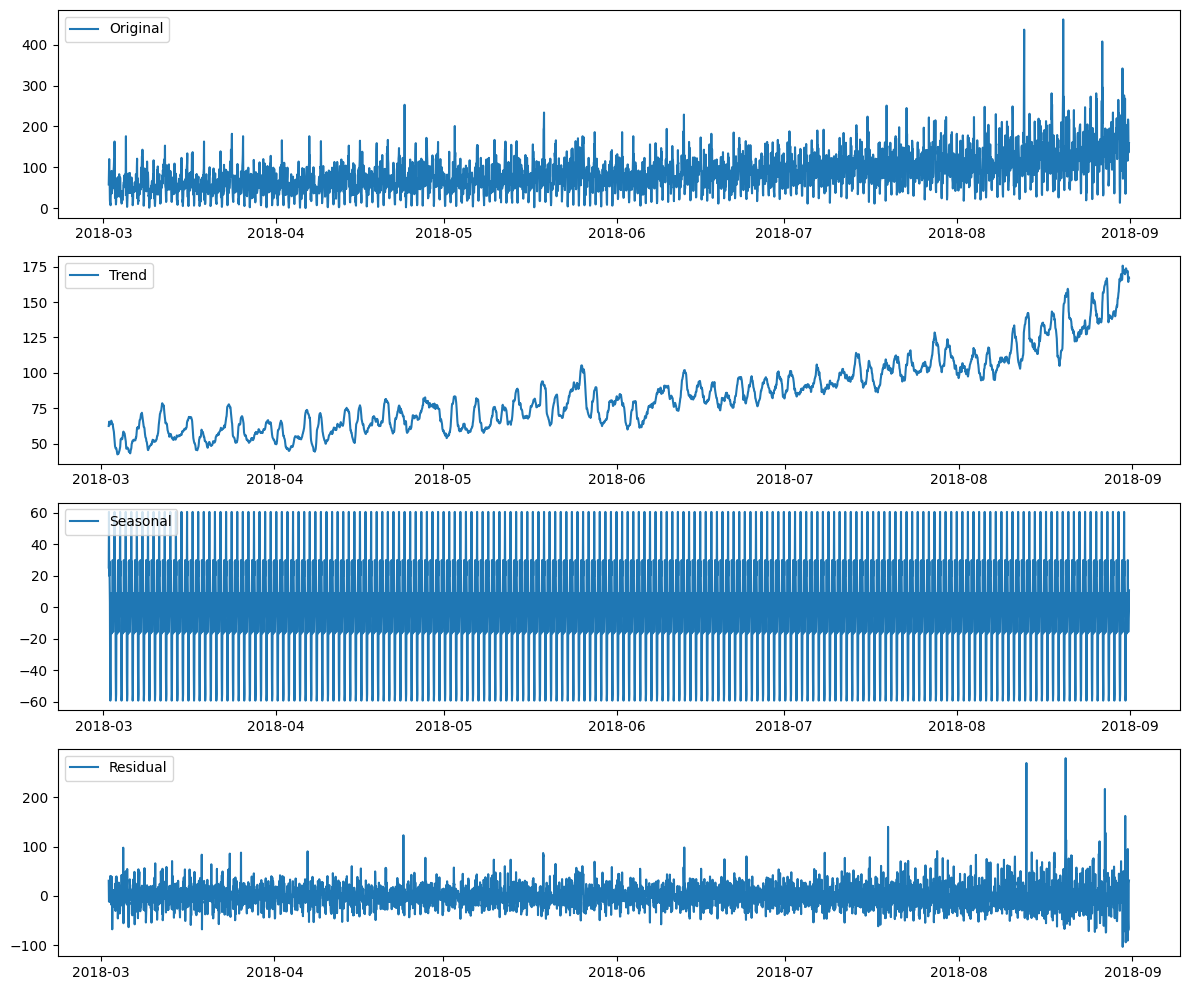

In [14]:
# graficar las componentes de la descomposicion estacional
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(df_hourly['num_orders'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Formación

In [15]:
# definir caracteristicas y objetivo
features_df_hourly = ['num_orders', 'MMS_24h', 'diff', 'hour', 'day_of_week', 'month']
features = df_hourly[features_df_hourly]
target = df_hourly['target']

In [16]:
# dividir en conjunto de entrenamiento y prueba - 90% entrenamiento y 10% prueba
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, shuffle=False)

In [17]:
# verificar tamaño de caracteristicas y objetivos de entrenamiento y prueba
print("Tamaño de features_train:", features_train.shape)
print("Tamaño de features_test:", features_test.shape)
print("Tamaño de target_train:", target_train.shape)
print("Tamaño de target_test:", target_test.shape)
print("\n")

Tamaño de features_train: (3951, 6)
Tamaño de features_test: (440, 6)
Tamaño de target_train: (3951,)
Tamaño de target_test: (440,)




  <div class="alert alert-block alert-success">


 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente divisón de los datos mediante train_test_split! Sigamos así Ilse!

### Modelo Bosque Aleatorio

In [18]:
# rf_model = RandomForestRegressor(n_estimators=100, max_depth=10) - RMSE = 15.23
# reducir numero de estimadores, desactivar bootstrap
rf_model = RandomForestRegressor(n_estimators=5, max_depth=2, random_state=42, bootstrap=False)
rf_model.fit(features_train, target_train)
rf_pred = rf_model.predict(features_test)

### Modelo XGBoost

In [19]:
# xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1) - RMSE = 12.25
# xgb_model.fit(features_train, target_train)

# xgb_model = xgb.XGBRegressor(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=42) - RMSE = 33.42

xgb_model = xgb.XGBRegressor(
    n_estimators=5,             # Reducir el número de estimadores
    learning_rate=2.0,          # Aumentar la tasa de aprendizaje
    max_depth=1,                # Reducir la profundidad máxima de los árboles
    subsample=0.3,              # Reducir la proporción de muestras
    colsample_bytree=0.3,       # Reducir la proporción de características
    gamma=20,                   # Aumentar el parámetro gamma
    reg_lambda=20,              # Aumentar la regularización L2
    reg_alpha=20,               # Aumentar la regularización L1
    min_child_weight=20,        # Aumentar min_child_weight
    random_state=42
)
xgb_model.fit(features_train, target_train, eval_set=[(features_test, target_test)], early_stopping_rounds=5, verbose=False)
xgb_pred = xgb_model.predict(features_test)

  <div class="alert alert-block alert-success">


 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Perfecto procedimiento de los modelos Ilse! PPor un lado hemos creado un modelo, las declaraciones, los uso de hiperparametros y el entrenamiento estan perfectamente implementados! Si quisieramos mejorarlo podríamos implementar lógicas de loops para observar como diferentes valores impactan en el modelo.

## Prueba

In [20]:
# prueba recm en modelos superior a 48 - RECM = RMSE
rf_rmse = mean_squared_error(target_test, rf_pred, squared=False)
print(f'Random Forest RMSE: {rf_rmse}')

Random Forest RMSE: 64.13641480209311


In [21]:
xgb_rmse = mean_squared_error(target_test, xgb_pred, squared=False)
print(f'XGBoost RMSE: {xgb_rmse}')

XGBoost RMSE: 59.33409169551525


  <div class="alert alert-block alert-success">


 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Buenos resultados, excelnete elección de métrica acorde a nuestro problema!

# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [ ]  	
Los datos han sido descargados y preparados.
- [ ]  Se ha realizado el paso 2: los datos han sido analizados
- [ ]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [ ]  Se han evaluado los modelos. Se expuso una conclusión
- [ ] La *RECM* para el conjunto de prueba no es más de 48